esperienza 1 lab 2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fs_V = 2
divisioni = 50

fs_I = 500

dV = fs_V/divisioni
dI = fs_I/divisioni
err_v = dV/2 
err_i = dI/2

In [6]:
Vx_monte_lista= [0.10, 0.26, 0.42, 0.52, 0.62, 0.72, 0.80, 0.91]
Ix_monte_lista= [50, 125, 195, 240, 290, 340, 385, 440]

Vx_monte = np.array(Vx_monte_lista)
Ix_monte = np.array(Ix_monte_lista)

Vx_valle_lista=[0.12, 0.33, 0.52, 0.64, 0.76, 0.88, 1.01, 1.13]
Ix_valle_lista=[50, 118, 184, 228, 272, 318, 360, 408]

Vx_valle = np.array(Vx_valle_lista)
Ix_valle = np.array(Ix_valle_lista)

Ones = np.ones(len(Vx_monte_lista))
Err_V = Ones * err_v
Err_I = Ones * err_i

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\emman\AppData\Local\Temp\ipykernel_21816\2180165007.py:5: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$V [V]', size=14)
C:\Users\emman\AppData\Local\Temp\ipykernel_21816\2180165007.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('I [$\mu$A]', size=14)


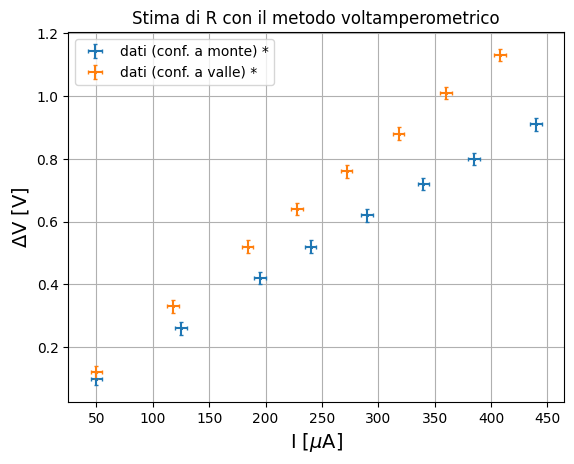

In [7]:
plt.errorbar(Ix_monte, Vx_monte, xerr=Err_I, yerr=Err_V, fmt='*', markersize=2., capsize=1.5, label='dati (conf. a monte) *')
plt.errorbar(Ix_valle, Vx_valle, xerr=Err_I, yerr=Err_V, fmt='*', markersize=2., capsize=1.5, label='dati (conf. a valle) *')

plt.legend()
plt.ylabel('$\Delta$V [V]', size=14)
plt.xlabel('I [$\mu$A]', size=14)
plt.grid()
plt.title('Stima di R con il metodo voltamperometrico')

plt.show()

In [8]:
def fit_lineare_pesato(x,y,w, verbose=True) :

    S_0 = np.sum(w)
    S_x = np.sum(x*w)     
    S_xx = np.sum(x*x*w)     
    S_y = np.sum(y*w)
    S_xy = np.sum(x*y*w)
    D = S_0 * S_xx - S_x**2
    a = (S_xx * S_y - S_x * S_xy) / D
    b = (S_0 * S_xy - S_x * S_y) / D
    var_a = S_xx / D
    var_b = S_0 / D
    cov_ab = -S_x / D
    sigma_a = np.sqrt(var_a)
    sigma_b = np.sqrt(var_b)
    # Compute chi^2 = \sum w_i (y_i - (a + b * x_i))^2
    chi2 = np.sum (w * (y-(a+b*x))**2)
    if verbose:
        print(f"a = {a}+/-{sigma_a}")
        print(f"b = {b}+/-{sigma_b}")
        print(f"cov(a,b) = {cov_ab}")
        print(f"chi/ndof= {chi2}/{len(x)-2} = {chi2/(len(x)-2)}")

    return a,b,sigma_a,sigma_b,cov_ab,chi2

In [9]:
a_m_monte, b_m_monte, sigma_a_m_monte, sigma_b_m_monte, cov_ab_m_monte, chi2_m_monte = fit_lineare_pesato(Ix_monte, Vx_monte, 1.0/Err_V**2)

a = 0.006675272885298704+/-0.016371102162561473
b = 0.0020806769089189397+/-5.720198669524935e-05
cov(a,b) = -8.446023671361742e-07
chi/ndof= 1.8858099644673907/6 = 0.3143016607445651


<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\m'
C:\Users\emman\AppData\Local\Temp\ipykernel_21816\180655369.py:6: SyntaxWarning: invalid escape sequence '\m'
  str_B = f'b = ({b_m_monte:.5f} ± {sigma_b_m_monte:.5f}) V/$\mu$A'
C:\Users\emman\AppData\Local\Temp\ipykernel_21816\180655369.py:13: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$V [V]', size=14)
C:\Users\emman\AppData\Local\Temp\ipykernel_21816\180655369.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('I [$\mu$A]', size=14)


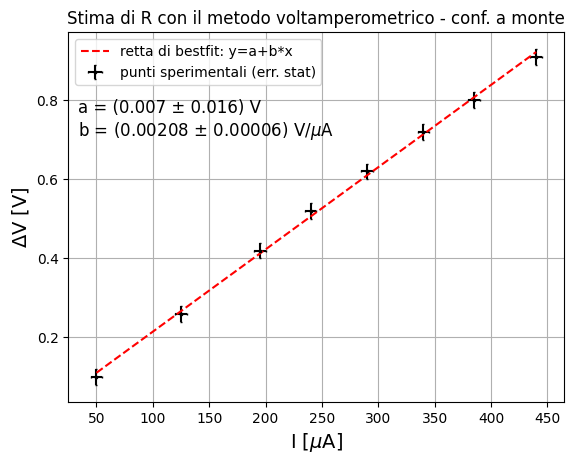

In [10]:
plt.errorbar(Ix_monte, Vx_monte, xerr=Err_I, yerr=Err_V, fmt='s', markersize=2., capsize=1, color='black', label='punti sperimentali (err. stat)')

plt.plot(Ix_monte, a_m_monte + b_m_monte*Ix_monte, color='red', ls='--', label='retta di bestfit: y=a+b*x')

str_A = f'a = ({a_m_monte:.3f} ± {sigma_a_m_monte:.3f}) V'
str_B = f'b = ({b_m_monte:.5f} ± {sigma_b_m_monte:.5f}) V/$\mu$A'

plt.annotate(str_A+'\n'+str_B,
        xy=(0.02, 0.82), xycoords='axes fraction',
        ha='left', va='top', fontsize=12)

plt.legend()
plt.ylabel('$\Delta$V [V]', size=14)
plt.xlabel('I [$\mu$A]', size=14)
plt.grid()
plt.title('Stima di R con il metodo voltamperometrico - conf. a monte')
plt.show()

In [11]:
a_m_valle, b_m_valle, sigma_a_m_valle, sigma_b_m_valle, cov_ab_m_valle, chi2_m_valle = fit_lineare_pesato(Ix_valle, Vx_valle, 1.0/Err_V**2)

a = -0.006733746651211335+/-0.016607480205799403
b = 0.0028090144340607278+/-6.203063969272337e-05
cov(a,b) = -9.321296131517813e-07
chi/ndof= 1.3004314346042272/6 = 0.21673857243403785


<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\m'
C:\Users\emman\AppData\Local\Temp\ipykernel_21816\4272861007.py:6: SyntaxWarning: invalid escape sequence '\m'
  str_B = f'b = ({b_m_valle:.5f} ± {sigma_b_m_valle:.5f}) V/$\mu$A'
C:\Users\emman\AppData\Local\Temp\ipykernel_21816\4272861007.py:13: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$V [V]', size=14)
C:\Users\emman\AppData\Local\Temp\ipykernel_21816\4272861007.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('I [$\mu$A]', size=14)


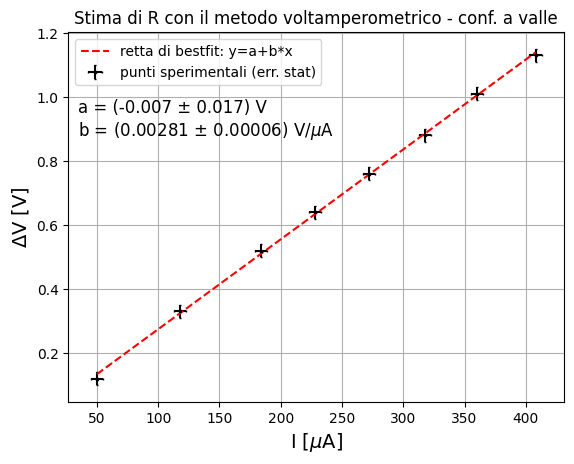

In [12]:
plt.errorbar(Ix_valle, Vx_valle, xerr=Err_I, yerr=Err_V, fmt='s', markersize=2., capsize=1, color='black', label='punti sperimentali (err. stat)')

plt.plot(Ix_valle, a_m_valle + b_m_valle*Ix_valle, color='red', ls='--', label='retta di bestfit: y=a+b*x')

str_A = f'a = ({a_m_valle:.3f} ± {sigma_a_m_valle:.3f}) V'
str_B = f'b = ({b_m_valle:.5f} ± {sigma_b_m_valle:.5f}) V/$\mu$A'

plt.annotate(str_A+'\n'+str_B,
        xy=(0.02, 0.82), xycoords='axes fraction',
        ha='left', va='top', fontsize=12)

plt.legend()
plt.ylabel('$\Delta$V [V]', size=14)
plt.xlabel('I [$\mu$A]', size=14)
plt.grid()
plt.title('Stima di R con il metodo voltamperometrico - conf. a valle')
plt.show()

In [61]:
Im_lista= [-342,-337,-326,-320,-304,-290,-259,-212,-201,-199,-189,-182,-160,-140,-107,-72,-59,-58,-52,-49,-42,-38,-31,-26,-20,-9,-8,2,8,13,21,29,35,42,50,61,89,118,150,202]
R_lista=[4700,4000,3500,3000,2500,2000,1500,1000,950,900,850,800,700,600,500,400,380,370,360,350,340,330,320,310,300,290,280,270,260,250,240,230,220,210,200,190,160,130,100,60]

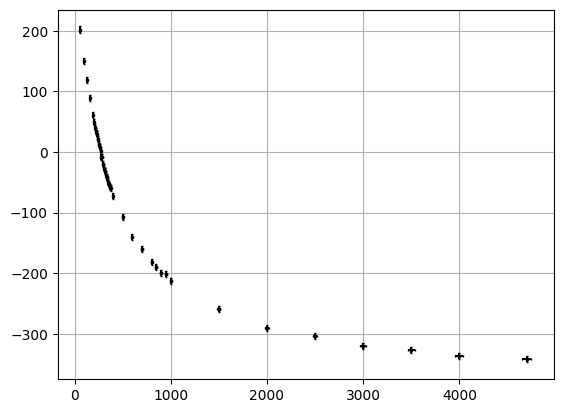

In [62]:
R=np.array(R_lista)
Im=np.array(Im_lista)
err=np.ones(len(Im))
Im_err=err*5
R_err_lista=[]
for i in R_lista:
    r_err=i/100
    R_err_lista.append(r_err)

R_err=np.array(R_err_lista)
plt.errorbar(R, Im, xerr=R_err, yerr=Im_err, fmt='s', markersize=2., capsize=1, color='black')
plt.grid()
plt.show()

In [87]:
R_fit_lista=[500,400,380,370,360,350,340,330,320,310,300,290,280,270,260,250,240,230,220,210,200,190,160,130,100,60]
Im_fit_lista=[-140,-107,-72,-59,-58,-52,-49,-42,-38,-31,-26,-20,-9,-8,2,8,13,21,29,35,42,50,61,89,118,150]
R_fit=np.array(R_fit_lista)
Im_fit=np.array(Im_fit_lista)
err_fit=np.ones(len(Im_fit))
Im_err_fit=err_fit*5
R_err_lista_fit=[]
for i in R_fit_lista:
    r_err=i/100
    R_err_lista_fit.append(r_err)

R_err_fit=np.array(R_err_lista_fit)

In [88]:
a_m, b_m, sigma_a_m, sigma_b_m, cov_ab_m, chi2_m = fit_lineare_pesato(R_fit, Im_fit, 1.0/Im_err_fit**2)

a = 175.58957083091775+/-2.9068548163168417
b = -0.6607558640572854+/-0.01009194502160566
cov(a,b) = -0.027616301844220554
chi/ndof= 45.78294417198097/24 = 1.9076226738325406


<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\emman\AppData\Local\Temp\ipykernel_21816\1494834074.py:5: SyntaxWarning: invalid escape sequence '\m'
  str_B = f'b = ({a_m:.5f} ± {sigma_a_m:.5f}) V/$\mu$A' #vanno cambiate le unità di misura e salvato con nome il grafico#


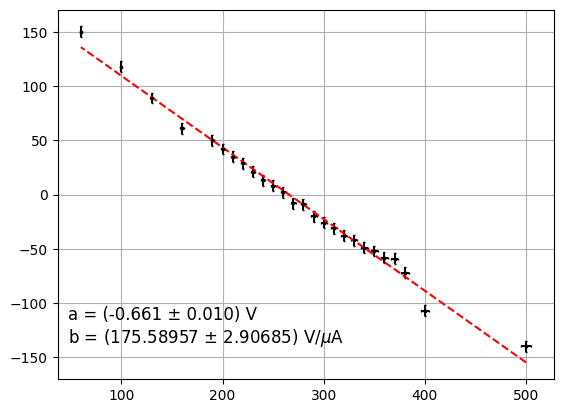

In [94]:
plt.errorbar(R_fit, Im_fit, xerr=R_err_fit, yerr=Im_err_fit, fmt='s', markersize=2., capsize=1, color='black')
plt.plot(R_fit, a_m + b_m*R_fit, color='red', ls='--', label='retta di bestfit: y=a+b*x')

str_A = f'a = ({b_m:.3f} ± {sigma_b_m:.3f}) V'
str_B = f'b = ({a_m:.5f} ± {sigma_a_m:.5f}) V/$\mu$A' #vanno cambiate le unità di misura e salvato con nome il grafico#

plt.annotate(str_A+'\n'+str_B,
        xy=(0.02, 0.2), xycoords='axes fraction',
        ha='left', va='top', fontsize=12)
plt.grid()
plt.show()

In [80]:
prop_err_R3=((1/0.6607558640572854)*2.9068548163168417)+((175.58957083091775/0.6607558640572854)*0.01009194502160566)
print(prop_err_R3)

7.081125368724919
